In [ ]:

#from rpy2.robjects import pandas2ri, r

#pd.set_option('display.max_columns', None)
#pd.options.mode.chained_assignment = None

#os.chdir('C:/Users/User/Desktop/yildiz_istatistik/ist_bilg_uyg/Uygulama_2/')

#filename = 'izimirhavakir-veri.sav'
#w = r('foreign::read.spss("%s", to.data.frame=TRUE)' % filename)
#df = pandas2ri.ri2py(w)
#df.head()

#df = pd.read_csv('C:\\Users\\User\\Desktop\\yildiz_istatistik\\ist_bilg_uyg\\Uygulama_1\\x1.csv',encoding='utf-8')

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir('C:/Users/User/Desktop/yildiz_istatistik/ist_bilg_uyg/Uygulama_2/')
df = pd.read_excel('izmveri.xls', sheet_name='izmveri')

In [2]:
df=pd.DataFrame(df)
len(df)

824

In [3]:
df.head()

,Cadde_no,Tarih,saat,so2,toz,CO,NO,NO2,NOx,O3,ruzgar_hizi,ruzgar_yonu,sicaklik,nem,basinc,kabin_sicakligi,Motorsiklet,otomobil,minibus_kamyonet,otobus_kamyon
0,MithatPasa,2008-02-15,00:00:00,20.0,99.3,1745.6,86.7,64.5,151.2,3.7,0.3,198.4,4.8,63.2,1025.4,16.5,7,649,61,15
1,MithatPasa,2008-02-15,01:00:00,20.0,108.3,1888.8,100.2,62.9,163.1,3.6,0.4,110.7,5.1,60.7,1025.4,16.4,7,311,50,0
2,MithatPasa,2008-02-15,02:00:00,15.2,49.3,1268.9,34.0,58.3,92.4,4.1,0.6,110.9,5.6,55.7,1025.3,16.4,1,226,18,0
3,MithatPasa,2008-02-15,03:00:00,14.4,52.0,1084.8,8.0,52.1,60.2,5.0,0.4,188.5,4.9,57.3,1025.1,16.4,1,104,9,0
4,MithatPasa,2008-02-15,04:00:00,14.2,56.9,1282.6,4.8,48.3,53.1,4.2,0.3,190.3,3.8,63.1,1024.9,16.4,1,91,9,0


In [4]:
#check nulls
df.isnull().sum()

Cadde_no            0
Tarih               0
saat                0
so2                 0
toz                 0
CO                  0
NO                  0
NO2                 0
NOx                 0
O3                  0
ruzgar_hizi         0
ruzgar_yonu         0
sicaklik            0
nem                 0
basinc              0
kabin_sicakligi     0
Motorsiklet         0
otomobil            0
minibus_kamyonet    0
otobus_kamyon       0
dtype: int64

In [5]:
len(df.columns)

20

In [6]:
colname = df.columns[3:19]
print (colname)

Index(['so2', 'toz', 'CO', 'NO', 'NO2', 'NOx', 'O3', 'ruzgar_hizi',
       'ruzgar_yonu', 'sicaklik', 'nem', 'basinc', 'kabin_sicakligi',
       'Motorsiklet', 'otomobil', 'minibus_kamyonet'],
      dtype='object')


In [7]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 50)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    labels=['so2', 'toz', 'CO', 'NO', 'NO2', 'NOx', 'O3', 'ruzgar_hizi',
       'ruzgar_yonu', 'sicaklik', 'nem', 'basinc', 'kabin_sicakligi',
       'Motorsiklet', 'otomobil', 'minibus_kamyonet',]
    ax1.set_xticklabels(labels,fontsize=8)
    ax1.set_yticklabels(labels,fontsize=8)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

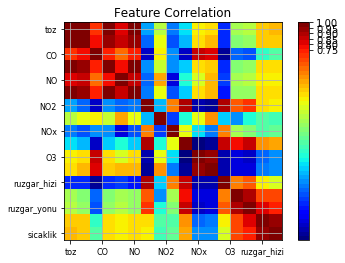

In [8]:
#lets look at whole datasets general correlation graph
correlation_matrix(df.iloc[3:19])

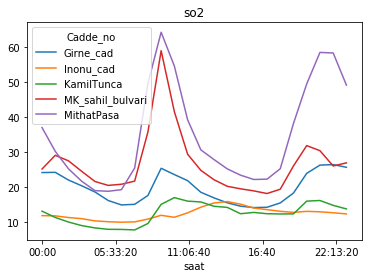

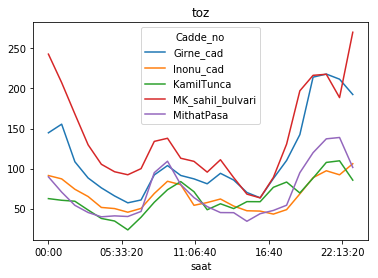

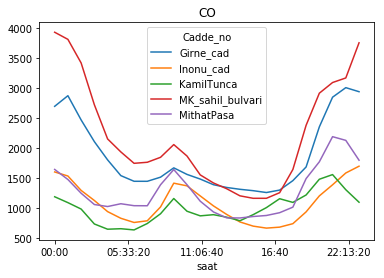

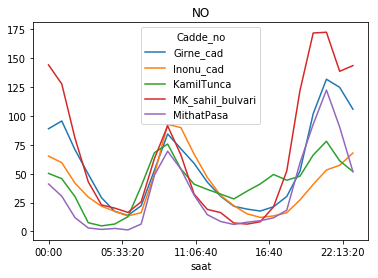

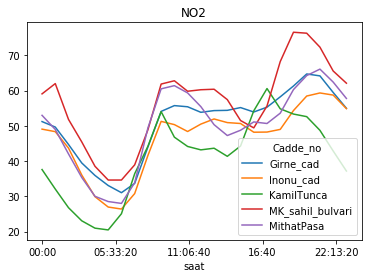

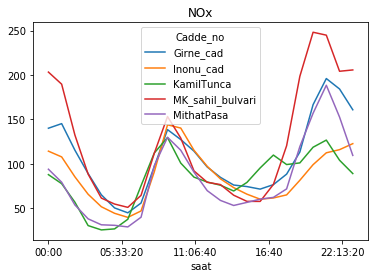

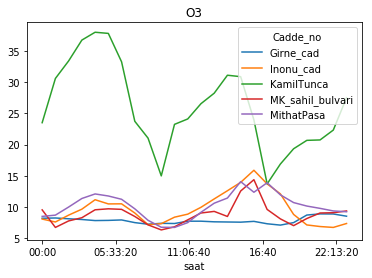

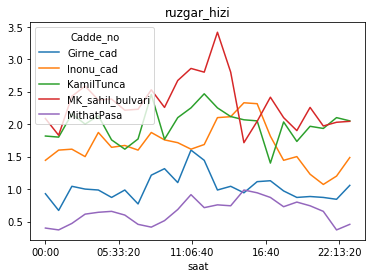

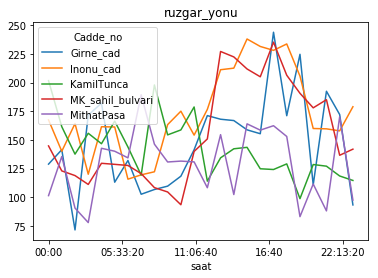

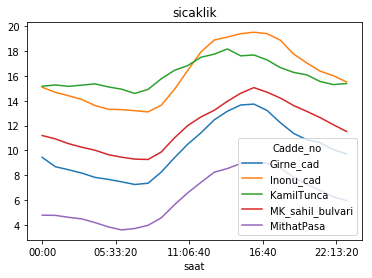

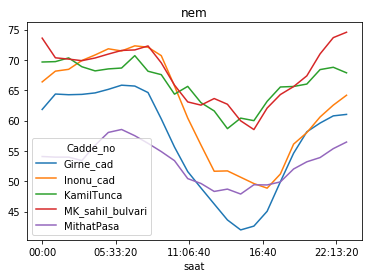

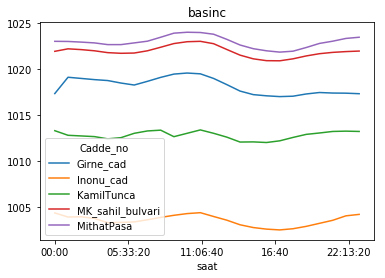

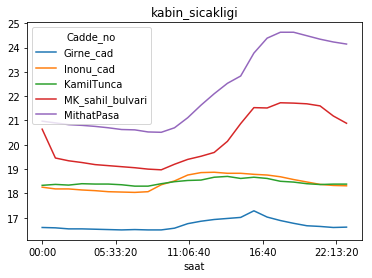

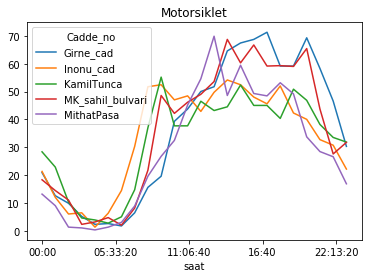

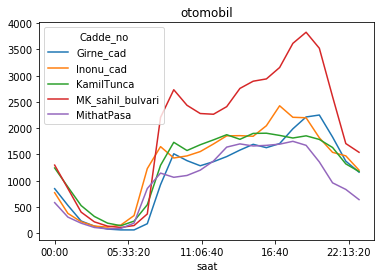

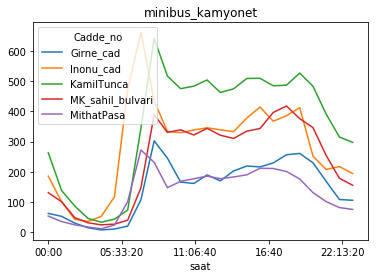

In [9]:
#lets check every variables behavior on hourly basis regard to different areas
for i in colname:
    df.reset_index().pivot_table(index=['saat'], columns='Cadde_no', values=i,aggfunc='mean').plot(title=i)

In [10]:
#lets check that if our variables distribution is normal
# Shapiro-Wilk Test
from numpy.random import seed
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
for i in colname:
    stat, p = shapiro(df[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
    alpha = 0.05
    if p > alpha:
        print('Sample %s looks Gaussian (fail to reject H0)' %i)
    else:
        print('Sample %s does not look Gaussian (reject H0)' %i)


Statistics=0.733, p=0.000
Sample so2 does not look Gaussian (reject H0)
Statistics=0.760, p=0.000
Sample toz does not look Gaussian (reject H0)
Statistics=0.754, p=0.000
Sample CO does not look Gaussian (reject H0)
Statistics=0.679, p=0.000
Sample NO does not look Gaussian (reject H0)
Statistics=0.992, p=0.000
Sample NO2 does not look Gaussian (reject H0)
Statistics=0.803, p=0.000
Sample NOx does not look Gaussian (reject H0)
Statistics=0.673, p=0.000
Sample O3 does not look Gaussian (reject H0)
Statistics=0.888, p=0.000
Sample ruzgar_hizi does not look Gaussian (reject H0)
Statistics=0.934, p=0.000
Sample ruzgar_yonu does not look Gaussian (reject H0)
Statistics=0.992, p=0.000
Sample sicaklik does not look Gaussian (reject H0)
Statistics=0.969, p=0.000
Sample nem does not look Gaussian (reject H0)
Statistics=0.959, p=0.000
Sample basinc does not look Gaussian (reject H0)
Statistics=0.571, p=0.000
Sample kabin_sicakligi does not look Gaussian (reject H0)
Statistics=0.942, p=0.000
Sampl

In [11]:
#lets look at variables mean values regard to location and time basis
#from this time I discard day basis so calculated mean scores on hour basis for every area
tbl1=[]
for i in colname:
    tbl1.append(df.groupby(['Cadde_no','saat']).mean()[i])

In [12]:
#make it structered
tbl2=pd.DataFrame(tbl1)
tbl2=tbl2.transpose().reset_index()
tbl2.head()

,Cadde_no,saat,so2,toz,CO,NO,NO2,NOx,O3,ruzgar_hizi,ruzgar_yonu,sicaklik,nem,basinc,kabin_sicakligi,Motorsiklet,otomobil,minibus_kamyonet
0,Girne_cad,00:00:00,24.185714,144.657143,2694.842857,89.000000,51.200000,140.185714,8.185714,0.928571,128.871429,9.442857,61.828571,1017.328571,16.600000,20.857143,847.857143,63.000000
1,Girne_cad,01:00:00,24.242857,155.400000,2871.357143,95.728571,49.642857,145.342857,8.228571,0.671429,141.442857,8.685714,64.371429,1019.100000,16.585714,12.571429,529.428571,53.285714
2,Girne_cad,02:00:00,22.057143,108.485714,2468.500000,70.785714,44.714286,115.514286,8.100000,1.042857,71.500000,8.442857,64.257143,1018.971429,16.542857,9.857143,231.714286,30.857143
3,Girne_cad,03:00:00,20.414286,88.242857,2108.071429,49.742857,39.471429,89.200000,7.985714,1.000000,171.557143,8.171429,64.314286,1018.842857,16.542857,5.142857,133.571429,15.428571
4,Girne_cad,04:00:00,18.657143,75.914286,1805.142857,29.314286,35.928571,65.257143,7.814286,0.985714,182.042857,7.828571,64.557143,1018.742857,16.528571,2.285714,78.000000,8.428571


In [13]:
#lets look at normality distribution of variables in base of areas
x=[]
for i in colname:
    x.append(tbl2.groupby(['Cadde_no'])[i].apply(shapiro))
tbl3=pd.DataFrame(x).transpose().reset_index()

In [14]:
tbl3

,Cadde_no,so2,toz,CO,NO,NO2,NOx,O3,ruzgar_hizi,ruzgar_yonu,sicaklik,nem,basinc,kabin_sicakligi,Motorsiklet,otomobil,minibus_kamyonet
0,Girne_cad,"(0.8973529934883118, 0.018922733142971992)","(0.8354665040969849, 0.0011886090505868196)","(0.8145856857299805, 0.0005150760407559574)","(0.9047125577926636, 0.027125325053930283)","(0.8921951055526733, 0.014759344048798084)","(0.9536746144294739, 0.32480257749557495)","(0.9321916103363037, 0.10913380235433578)","(0.9216798543930054, 0.06362919509410858)","(0.9684194326400757, 0.6281341314315796)","(0.9287143349647522, 0.09124694019556046)","(0.8718518018722534, 0.0057201506569981575)","(0.8837026357650757, 0.009874069131910801)","(0.8552852869033813, 0.002744461642578244)","(0.8893036842346191, 0.01285858079791069)","(0.9100726842880249, 0.03539825975894928)","(0.9283027052879333, 0.08933594077825546)"
1,Inonu_cad,"(0.9595569372177124, 0.4295857548713684)","(0.9109281301498413, 0.03694510459899902)","(0.9248895049095154, 0.07497869431972504)","(0.9082012176513672, 0.032244972884655)","(0.8695240616798401, 0.005148999858647585)","(0.9604807496070862, 0.4481590688228607)","(0.9192202091217041, 0.05613737925887108)","(0.9587743282318115, 0.41429638862609863)","(0.9242368936538696, 0.0725138708949089)","(0.8987200856208801, 0.020221929997205734)","(0.8934020400047302, 0.015638388693332672)","(0.9453647136688232, 0.21455416083335876)","(0.8953245282173157, 0.017154337838292122)","(0.8738357424736023, 0.006259951740503311)","(0.8974422216415405, 0.019004780799150467)","(0.9497457146644592, 0.2675323784351349)"
2,KamilTunca,"(0.9298063516616821, 0.09651995450258255)","(0.9746837019920349, 0.7816321849822998)","(0.9596071243286133, 0.4305810034275055)","(0.9613213539123535, 0.4655438959598541)","(0.9421827793121338, 0.18243145942687988)","(0.9373873472213745, 0.14262402057647705)","(0.9655299186706543, 0.5589888691902161)","(0.971005380153656, 0.6918522119522095)","(0.9495847225189209, 0.26539021730422974)","(0.8984806537628174, 0.01998780481517315)","(0.9075847864151001, 0.03127163276076317)","(0.9296579957008362, 0.0957857221364975)","(0.8873187303543091, 0.011704468168318272)","(0.8860926628112793, 0.01104667317122221)","(0.8250724077224731, 0.0007795562851242721)","(0.8530855774879456, 0.0024955682456493378)"
3,MK_sahil_bulvari,"(0.7714415192604065, 0.00010415865108370781)","(0.9062677621841431, 0.02929369919002056)","(0.8988450169563293, 0.020345250144600868)","(0.8620129823684692, 0.0036835174541920424)","(0.9542829990386963, 0.3345598876476288)","(0.8734399676322937, 0.006148116197437048)","(0.8625800609588623, 0.003776947036385536)","(0.9509473443031311, 0.2840178310871124)","(0.9098973870277405, 0.0350896492600441)","(0.937488853931427, 0.14337077736854553)","(0.9334146976470947, 0.11623205989599228)","(0.9564940929412842, 0.37210801243782043)","(0.8306159973144531, 0.0009748555021360517)","(0.9004665613174438, 0.022019455209374428)","(0.9145365953445435, 0.04428686201572418)","(0.8645293116569519, 0.004117791540920734)"
4,MithatPasa,"(0.8738918304443359, 0.006275985389947891)","(0.8633927702903748, 0.0039152782410383224)","(0.8910475969314575, 0.013971743173897266)","(0.8466789126396179, 0.0018979868618771434)","(0.9158667325973511, 0.04736212268471718)","(0.9284249544143677, 0.08989930897951126)","(0.9781715869903564, 0.8599217534065247)","(0.9534315466880798, 0.32097262144088745)","(0.9641417860984802, 0.5270696878433228)","(0.9044843912124634, 0.026821624487638474)","(0.9442740082740784, 0.20298022031784058)","(0.9624884128570557, 0.4904233515262604)","(0.8019300699234009, 0.00031682371627539396)","(0.9261410236358643, 0.07994795590639114)","(0.8946046233177185, 0.016569314524531364)","(0.9304532408714294, 0.09978783130645752)"


In [15]:
tbl3=pd.DataFrame(tbl3)
for m in range(len(tbl3)):
    for i in colname:
        print('Cadde_no=%s,Statistics=%.3f,p=%.3f' % (tbl3.iloc[m,0],tbl3[i][0][0],tbl3[i][0][1]))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample %s looks Gaussian (fail to reject H0)' %i)
        else:
            print('Sample %s does not look Gaussian (reject H0)' %i)

Cadde_no=Girne_cad,Statistics=0.897,p=0.019
Sample so2 does not look Gaussian (reject H0)
Cadde_no=Girne_cad,Statistics=0.835,p=0.001
Sample toz does not look Gaussian (reject H0)
Cadde_no=Girne_cad,Statistics=0.815,p=0.001
Sample CO does not look Gaussian (reject H0)
Cadde_no=Girne_cad,Statistics=0.905,p=0.027
Sample NO does not look Gaussian (reject H0)
Cadde_no=Girne_cad,Statistics=0.892,p=0.015
Sample NO2 does not look Gaussian (reject H0)
Cadde_no=Girne_cad,Statistics=0.954,p=0.325
Sample NOx does not look Gaussian (reject H0)
Cadde_no=Girne_cad,Statistics=0.932,p=0.109
Sample O3 does not look Gaussian (reject H0)
Cadde_no=Girne_cad,Statistics=0.922,p=0.064
Sample ruzgar_hizi does not look Gaussian (reject H0)
Cadde_no=Girne_cad,Statistics=0.968,p=0.628
Sample ruzgar_yonu does not look Gaussian (reject H0)
Cadde_no=Girne_cad,Statistics=0.929,p=0.091
Sample sicaklik does not look Gaussian (reject H0)
Cadde_no=Girne_cad,Statistics=0.872,p=0.006
Sample nem does not look Gaussian (rej

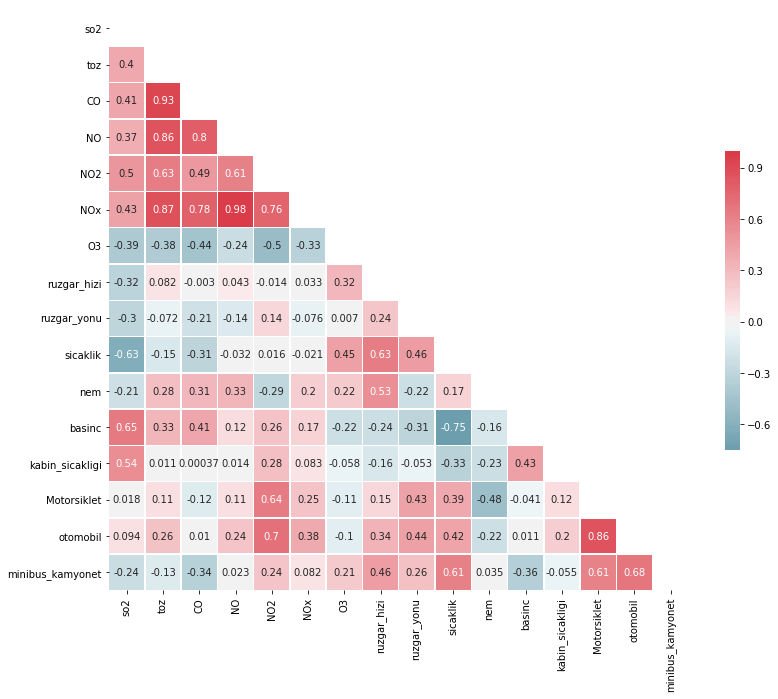

In [16]:
corr_all=tbl2.iloc[:,2:18]

# Compute the correlation matrix
corr = corr_all.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

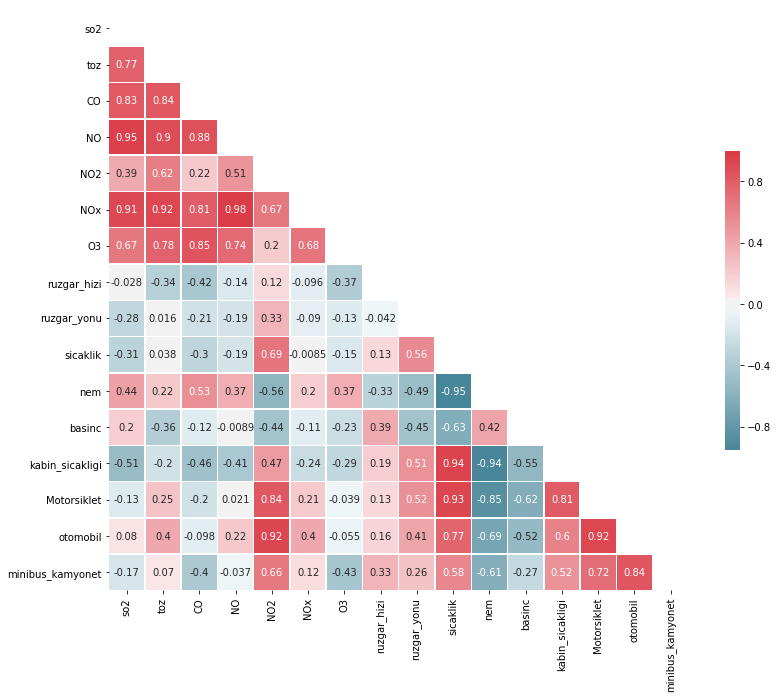

In [17]:
c1 = tbl2[tbl2['Cadde_no']=='Girne_cad']
c1=c1.iloc[:,2:]
c1

# Compute the correlation matrix
corr = c1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

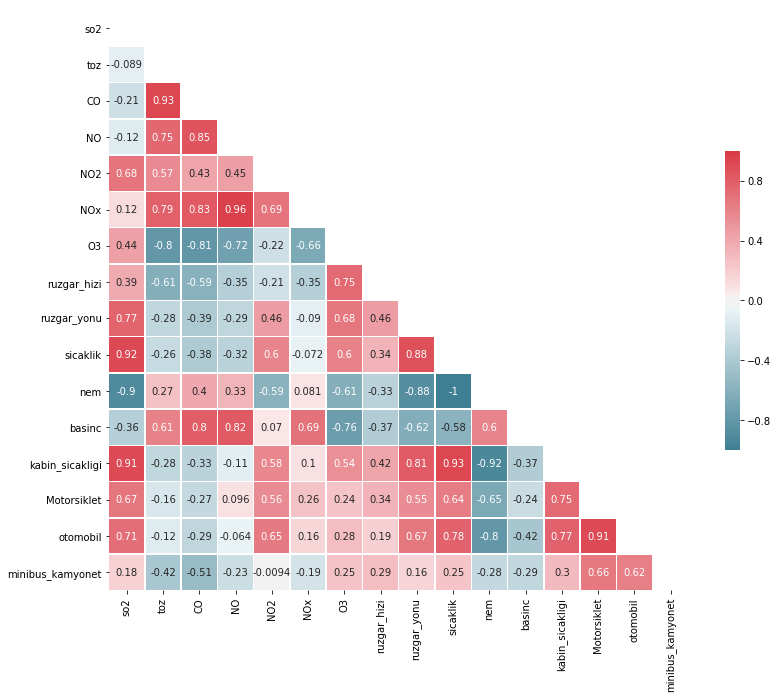

In [18]:
c2 = tbl2[tbl2['Cadde_no']=='Inonu_cad']
c2=c2.iloc[:,2:]
c2

# Compute the correlation matrix
corr = c2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

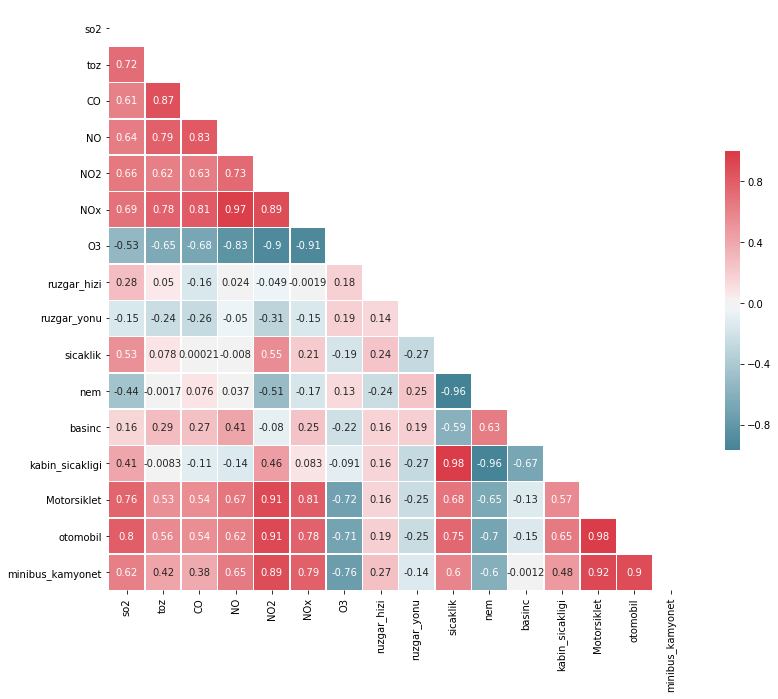

In [19]:
c3 = tbl2[tbl2['Cadde_no']=='KamilTunca']
c3=c3.iloc[:,2:]
c3

# Compute the correlation matrix
corr = c3.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

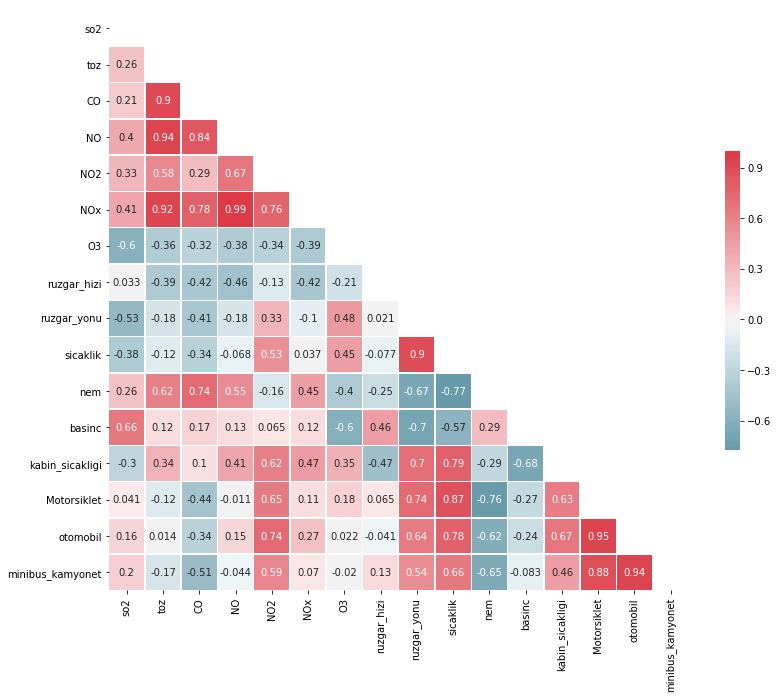

In [20]:
c4 = tbl2[tbl2['Cadde_no']=='MK_sahil_bulvari']
c4=c4.iloc[:,2:]
c4

# Compute the correlation matrix
corr = c4.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

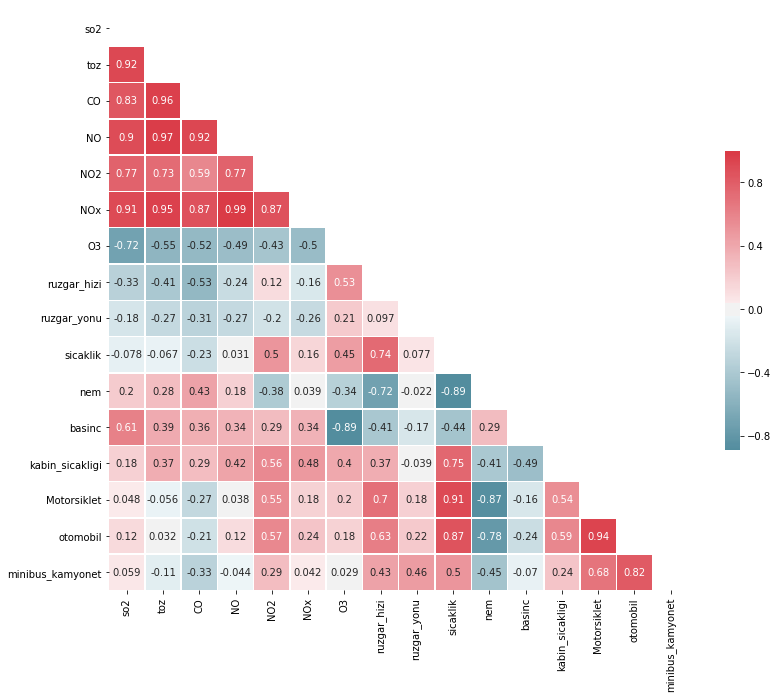

In [21]:
c5 = tbl2[tbl2['Cadde_no']=='MithatPasa']
c5=c5.iloc[:,2:]
c5

# Compute the correlation matrix
corr = c5.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

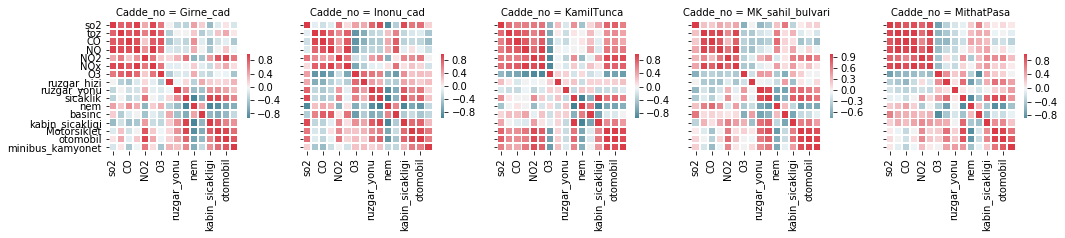

In [22]:
import seaborn as sns
g = sns.FacetGrid(tbl2, col='Cadde_no',height=3)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g1=g.map_dataframe(lambda data, color: sns.heatmap(data.iloc[:,2:].corr(),cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.9, cbar_kws={"shrink": .5}))
#g.map(sns.heatmap(corrx2,xticklabels=corrx2.columns,yticklabels=corrx2.columns,linewidths=0.5))


In [23]:
tbl4=tbl2
tbl4.head()

,Cadde_no,saat,so2,toz,CO,NO,NO2,NOx,O3,ruzgar_hizi,ruzgar_yonu,sicaklik,nem,basinc,kabin_sicakligi,Motorsiklet,otomobil,minibus_kamyonet
0,Girne_cad,00:00:00,24.185714,144.657143,2694.842857,89.000000,51.200000,140.185714,8.185714,0.928571,128.871429,9.442857,61.828571,1017.328571,16.600000,20.857143,847.857143,63.000000
1,Girne_cad,01:00:00,24.242857,155.400000,2871.357143,95.728571,49.642857,145.342857,8.228571,0.671429,141.442857,8.685714,64.371429,1019.100000,16.585714,12.571429,529.428571,53.285714
2,Girne_cad,02:00:00,22.057143,108.485714,2468.500000,70.785714,44.714286,115.514286,8.100000,1.042857,71.500000,8.442857,64.257143,1018.971429,16.542857,9.857143,231.714286,30.857143
3,Girne_cad,03:00:00,20.414286,88.242857,2108.071429,49.742857,39.471429,89.200000,7.985714,1.000000,171.557143,8.171429,64.314286,1018.842857,16.542857,5.142857,133.571429,15.428571
4,Girne_cad,04:00:00,18.657143,75.914286,1805.142857,29.314286,35.928571,65.257143,7.814286,0.985714,182.042857,7.828571,64.557143,1018.742857,16.528571,2.285714,78.000000,8.428571


In [24]:
#lets gather chemicals doing pca for whole dataset 
X_whole = tbl4.iloc[:,2:8] 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_whole = sc.fit_transform(X_whole)  

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  
X_whole = pca.fit_transform(X_whole)  
explained_variance = pca.explained_variance_ratio_ 

explained_variance

array([0.72866165, 0.13828307, 0.08512182])

In [25]:
print(pd.DataFrame(pca.components_,columns=tbl4.iloc[:,2:8].columns,index = ['PC-1','PC-2','PC-3']))

           so2       toz        CO        NO       NO2       NOx
PC-1  0.267540  0.450127  0.421972  0.445500  0.369738  0.461054
PC-2  0.838588 -0.215500 -0.239934 -0.239544  0.351921 -0.107384
PC-3  0.432043  0.171497  0.474514 -0.056776 -0.709402 -0.228670


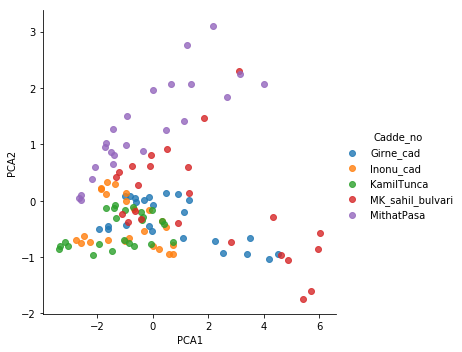

In [26]:
tbl4['PCA1'] = X_whole[:, 0]
tbl4['PCA2'] = X_whole[:, 1]
sns.lmplot("PCA1", "PCA2", hue='Cadde_no', data=tbl4, fit_reg=False);

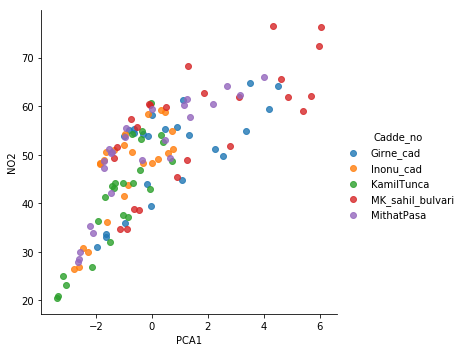

In [27]:
sns.lmplot("PCA1", "NO2", hue='Cadde_no', data=tbl4, fit_reg=False);

In [28]:
tbl4.head()

,Cadde_no,saat,so2,toz,CO,NO,NO2,NOx,O3,ruzgar_hizi,ruzgar_yonu,sicaklik,nem,basinc,kabin_sicakligi,Motorsiklet,otomobil,minibus_kamyonet,PCA1,PCA2
0,Girne_cad,00:00:00,24.185714,144.657143,2694.842857,89.000000,51.200000,140.185714,8.185714,0.928571,128.871429,9.442857,61.828571,1017.328571,16.600000,20.857143,847.857143,63.000000,2.245341,-0.718328
1,Girne_cad,01:00:00,24.242857,155.400000,2871.357143,95.728571,49.642857,145.342857,8.228571,0.671429,141.442857,8.685714,64.371429,1019.100000,16.585714,12.571429,529.428571,53.285714,2.529946,-0.920716
2,Girne_cad,02:00:00,22.057143,108.485714,2468.500000,70.785714,44.714286,115.514286,8.100000,1.042857,71.500000,8.442857,64.257143,1018.971429,16.542857,9.857143,231.714286,30.857143,1.071743,-0.659525
3,Girne_cad,03:00:00,20.414286,88.242857,2108.071429,49.742857,39.471429,89.200000,7.985714,1.000000,171.557143,8.171429,64.314286,1018.842857,16.542857,5.142857,133.571429,15.428571,-0.034947,-0.531735
4,Girne_cad,04:00:00,18.657143,75.914286,1805.142857,29.314286,35.928571,65.257143,7.814286,0.985714,182.042857,7.828571,64.557143,1018.742857,16.528571,2.285714,78.000000,8.428571,-0.954399,-0.424825


In [29]:
#pca for predicting categories with random forest
tbl5=tbl2
X = tbl5.iloc[:,0:8].drop(['Cadde_no','saat'], 1)  
y = tbl5['Cadde_no']  

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

explained_variance = pca.explained_variance_ratio_  

print(explained_variance)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=20, random_state=0)  
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print(accuracy_score(y_test, y_pred)) 

[0.73266082 0.13431277 0.08367136]
[[5 1 0 0 0]
 [0 4 1 0 0]
 [1 1 3 0 0]
 [2 0 0 3 0]
 [0 0 0 1 2]]
0.7083333333333334


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
tbl4.head()

,Cadde_no,saat,so2,toz,CO,NO,NO2,NOx,O3,ruzgar_hizi,ruzgar_yonu,sicaklik,nem,basinc,kabin_sicakligi,Motorsiklet,otomobil,minibus_kamyonet,PCA1,PCA2
0,Girne_cad,00:00:00,24.185714,144.657143,2694.842857,89.000000,51.200000,140.185714,8.185714,0.928571,128.871429,9.442857,61.828571,1017.328571,16.600000,20.857143,847.857143,63.000000,2.245341,-0.718328
1,Girne_cad,01:00:00,24.242857,155.400000,2871.357143,95.728571,49.642857,145.342857,8.228571,0.671429,141.442857,8.685714,64.371429,1019.100000,16.585714,12.571429,529.428571,53.285714,2.529946,-0.920716
2,Girne_cad,02:00:00,22.057143,108.485714,2468.500000,70.785714,44.714286,115.514286,8.100000,1.042857,71.500000,8.442857,64.257143,1018.971429,16.542857,9.857143,231.714286,30.857143,1.071743,-0.659525
3,Girne_cad,03:00:00,20.414286,88.242857,2108.071429,49.742857,39.471429,89.200000,7.985714,1.000000,171.557143,8.171429,64.314286,1018.842857,16.542857,5.142857,133.571429,15.428571,-0.034947,-0.531735
4,Girne_cad,04:00:00,18.657143,75.914286,1805.142857,29.314286,35.928571,65.257143,7.814286,0.985714,182.042857,7.828571,64.557143,1018.742857,16.528571,2.285714,78.000000,8.428571,-0.954399,-0.424825


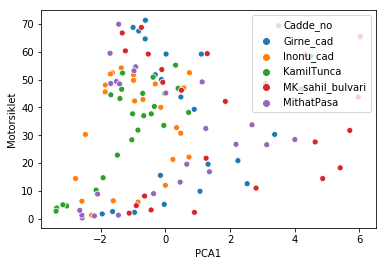

In [31]:
ax = sns.scatterplot(x="PCA1", y="Motorsiklet", hue="Cadde_no",data=tbl4)

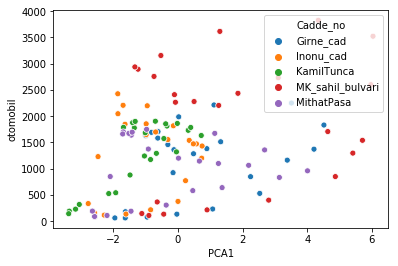

In [32]:
ax1 = sns.scatterplot(x="PCA1", y="otomobil", hue="Cadde_no",data=tbl4)

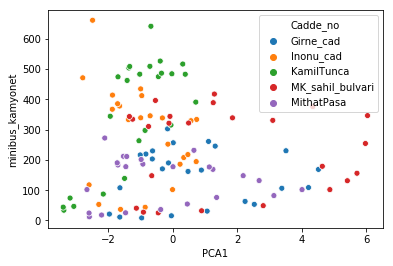

In [33]:
ax2 = sns.scatterplot(x="PCA1", y="minibus_kamyonet", hue="Cadde_no",data=tbl4)

In [34]:
tbl4.head()

,Cadde_no,saat,so2,toz,CO,NO,NO2,NOx,O3,ruzgar_hizi,ruzgar_yonu,sicaklik,nem,basinc,kabin_sicakligi,Motorsiklet,otomobil,minibus_kamyonet,PCA1,PCA2
0,Girne_cad,00:00:00,24.185714,144.657143,2694.842857,89.000000,51.200000,140.185714,8.185714,0.928571,128.871429,9.442857,61.828571,1017.328571,16.600000,20.857143,847.857143,63.000000,2.245341,-0.718328
1,Girne_cad,01:00:00,24.242857,155.400000,2871.357143,95.728571,49.642857,145.342857,8.228571,0.671429,141.442857,8.685714,64.371429,1019.100000,16.585714,12.571429,529.428571,53.285714,2.529946,-0.920716
2,Girne_cad,02:00:00,22.057143,108.485714,2468.500000,70.785714,44.714286,115.514286,8.100000,1.042857,71.500000,8.442857,64.257143,1018.971429,16.542857,9.857143,231.714286,30.857143,1.071743,-0.659525
3,Girne_cad,03:00:00,20.414286,88.242857,2108.071429,49.742857,39.471429,89.200000,7.985714,1.000000,171.557143,8.171429,64.314286,1018.842857,16.542857,5.142857,133.571429,15.428571,-0.034947,-0.531735
4,Girne_cad,04:00:00,18.657143,75.914286,1805.142857,29.314286,35.928571,65.257143,7.814286,0.985714,182.042857,7.828571,64.557143,1018.742857,16.528571,2.285714,78.000000,8.428571,-0.954399,-0.424825


In [35]:
len(tbl4.columns)

20

In [36]:
#lets gather vehicles doing pca for whole dataset 
V_whole = tbl4.iloc[:,15:18] 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
V_whole = sc.fit_transform(V_whole)  

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  
V_whole = pca.fit_transform(V_whole)  
explained_variance = pca.explained_variance_ratio_ 

explained_variance

array([0.81134024, 0.1445876 , 0.04407216])

In [37]:
print(pd.DataFrame(pca.components_,columns=tbl4.iloc[:,15:18].columns,index = ['PC-1','PC-2','PC-3']))

      Motorsiklet  otomobil  minibus_kamyonet
PC-1     0.589405  0.605905          0.534304
PC-2    -0.475364 -0.274636          0.835825
PC-3    -0.653170  0.746629         -0.126154


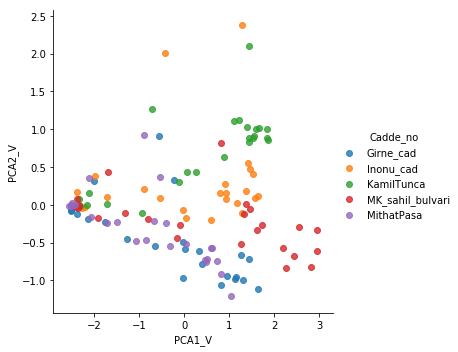

In [38]:
#add them to main table
tbl4['PCA1_V'] = V_whole[:, 0]
tbl4['PCA2_V'] = V_whole[:, 1]
sns.lmplot("PCA1_V", "PCA2_V", hue='Cadde_no', data=tbl4, fit_reg=False);

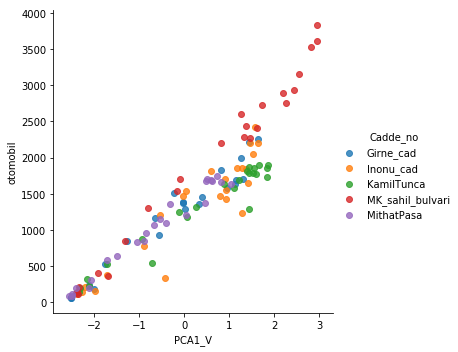

In [39]:
sns.lmplot("PCA1_V", "otomobil", hue='Cadde_no', data=tbl4, fit_reg=False);

In [40]:
tbl4.columns

Index(['Cadde_no', 'saat', 'so2', 'toz', 'CO', 'NO', 'NO2', 'NOx', 'O3',
       'ruzgar_hizi', 'ruzgar_yonu', 'sicaklik', 'nem', 'basinc',
       'kabin_sicakligi', 'Motorsiklet', 'otomobil', 'minibus_kamyonet',
       'PCA1', 'PCA2', 'PCA1_V', 'PCA2_V'],
      dtype='object')

In [41]:
#lets gather nature values doing pca for whole dataset 
#'O3','ruzgar_hizi', 'ruzgar_yonu', 'sicaklik'
N_whole = tbl4.iloc[:,8:12] 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
N_whole = sc.fit_transform(N_whole)  

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  
N_whole = pca.fit_transform(N_whole)  
explained_variance = pca.explained_variance_ratio_ 

explained_variance

array([0.53072337, 0.2496242 , 0.1521738 ])

In [42]:
print(pd.DataFrame(pca.components_,columns=tbl4.iloc[:,8:12].columns,index = ['PC-1','PC-2','PC-3']))

            O3  ruzgar_hizi  ruzgar_yonu  sicaklik
PC-1  0.406080     0.547816     0.376833  0.626893
PC-2 -0.657105    -0.084864     0.747296  0.050600
PC-3 -0.569653     0.705781    -0.421117  0.005387


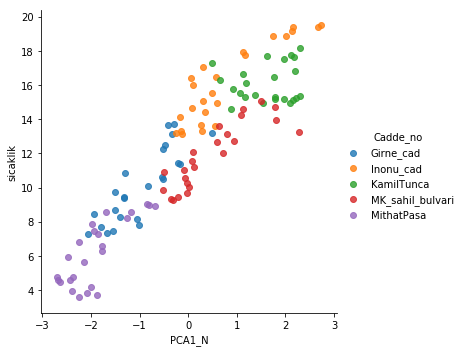

In [43]:
#add them to main table
tbl4['PCA1_N'] = N_whole[:, 0]
tbl4['PCA2_N'] = N_whole[:, 1]
sns.lmplot("PCA1_N", "sicaklik", hue='Cadde_no', data=tbl4, fit_reg=False);

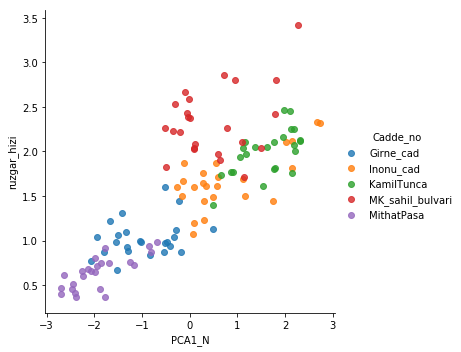

In [44]:
sns.lmplot("PCA1_N", "ruzgar_hizi", hue='Cadde_no', data=tbl4, fit_reg=False);

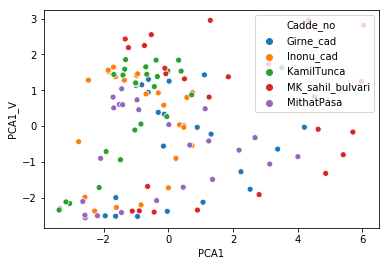

In [45]:
ax3 = sns.scatterplot(x="PCA1", y="PCA1_V", hue="Cadde_no",data=tbl4)

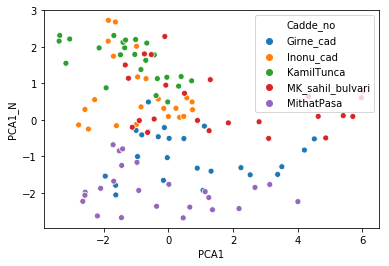

In [46]:
ax4 = sns.scatterplot(x="PCA1", y="PCA1_N", hue="Cadde_no",data=tbl4)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
tbl4['nem'] = sc.fit_transform(np.array(tbl4['nem']).reshape(-1,1))
tbl4['basinc'] = sc.fit_transform(np.array(tbl4['basinc']).reshape(-1,1))
tbl4['nb']=tbl4['nem']*tbl4['basinc']

In [48]:
tbl4.head()

,Cadde_no,saat,so2,toz,CO,NO,NO2,NOx,O3,ruzgar_hizi,...,Motorsiklet,otomobil,minibus_kamyonet,PCA1,PCA2,PCA1_V,PCA2_V,PCA1_N,PCA2_N,nb
0,Girne_cad,00:00:00,24.185714,144.657143,2694.842857,89.000000,51.200000,140.185714,8.185714,0.928571,...,20.857143,847.857143,63.000000,2.245341,-0.718328,-1.278359,-0.458412,-1.317875,0.012948,0.016941
1,Girne_cad,01:00:00,24.242857,155.400000,2871.357143,95.728571,49.642857,145.342857,8.228571,0.671429,...,12.571429,529.428571,53.285714,2.529946,-0.920716,-1.768080,-0.220943,-1.514283,0.275941,0.179216
2,Girne_cad,02:00:00,22.057143,108.485714,2468.500000,70.785714,44.714286,115.514286,8.100000,1.042857,...,9.857143,231.714286,30.857143,1.071743,-0.659525,-2.130362,-0.183187,-1.939707,-1.117506,0.165961
3,Girne_cad,03:00:00,20.414286,88.242857,2108.071429,49.742857,39.471429,89.200000,7.985714,1.000000,...,5.142857,133.571429,15.428571,-0.034947,-0.531735,-2.383861,-0.127136,-1.043630,0.832908,0.162001
4,Girne_cad,04:00:00,18.657143,75.914286,1805.142857,29.314286,35.928571,65.257143,7.814286,0.985714,...,2.285714,78.000000,8.428571,-0.954399,-0.424825,-2.526773,-0.081961,-1.013159,1.048540,0.168574


In [49]:
#gather new variables into one data frame
new_df=pd.DataFrame(tbl4[['PCA1','PCA1_N','PCA1_V','nb']])
new_df.head()

,PCA1,PCA1_N,PCA1_V,nb
0,2.245341,-1.317875,-1.278359,0.016941
1,2.529946,-1.514283,-1.768080,0.179216
2,1.071743,-1.939707,-2.130362,0.165961
3,-0.034947,-1.043630,-2.383861,0.162001
4,-0.954399,-1.013159,-2.526773,0.168574


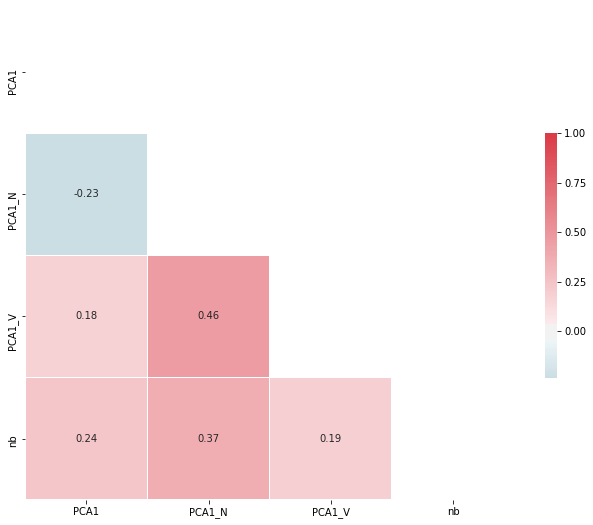

In [50]:
# Compute the correlation matrix
corr = new_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

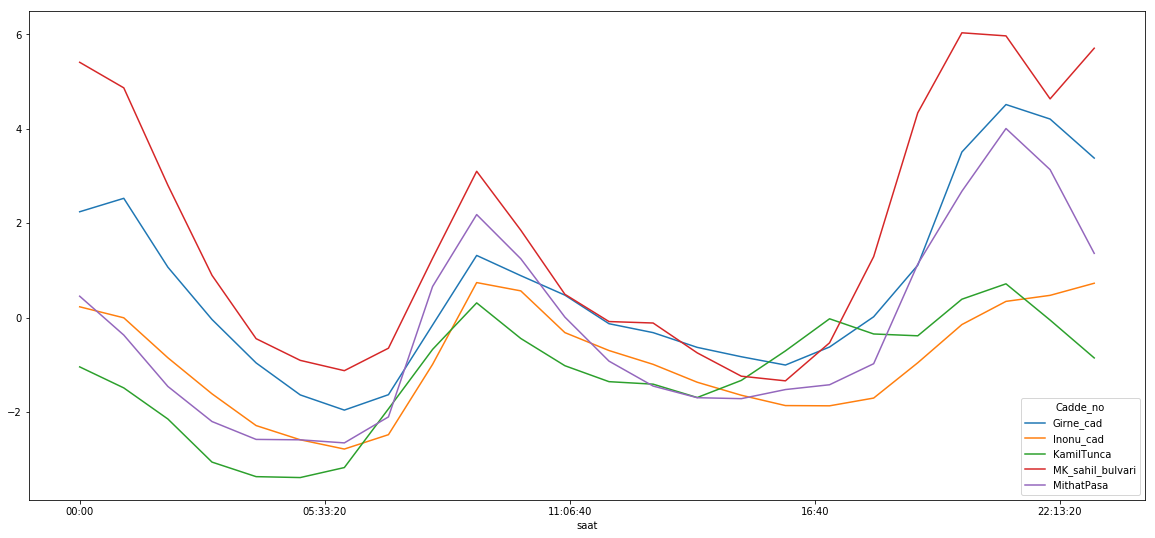

In [51]:
fig, ax = plt.subplots(figsize=(20,9))
tbl4.reset_index().pivot_table(index=['saat'], columns=('Cadde_no'), values=('PCA1')).plot(ax=ax)

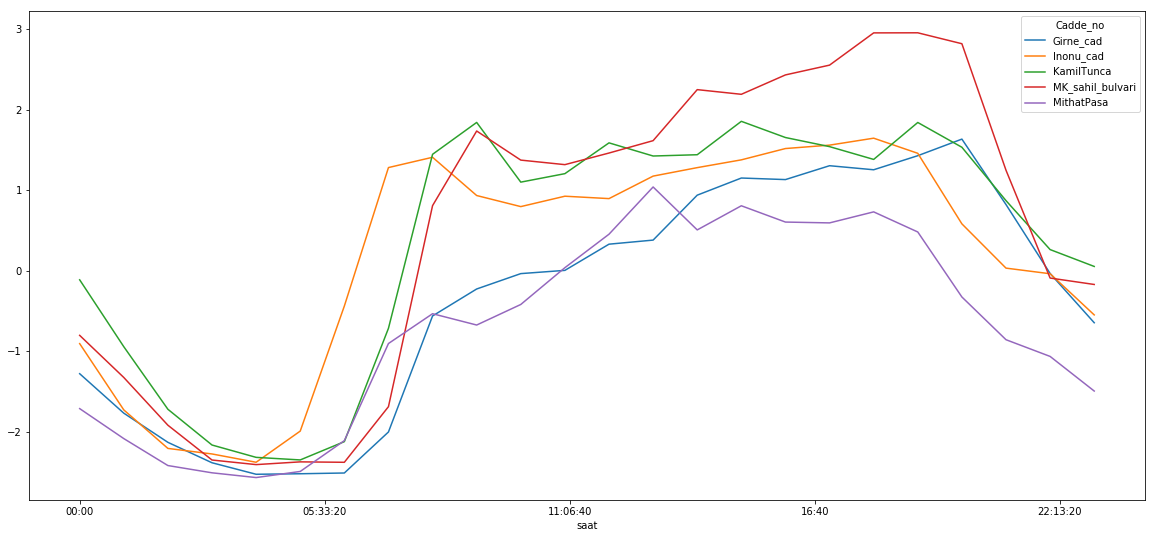

In [52]:
fig, ax = plt.subplots(figsize=(20,9))
tbl4.reset_index().pivot_table(index=['saat'], columns=('Cadde_no'), values=('PCA1_V')).plot(ax=ax)

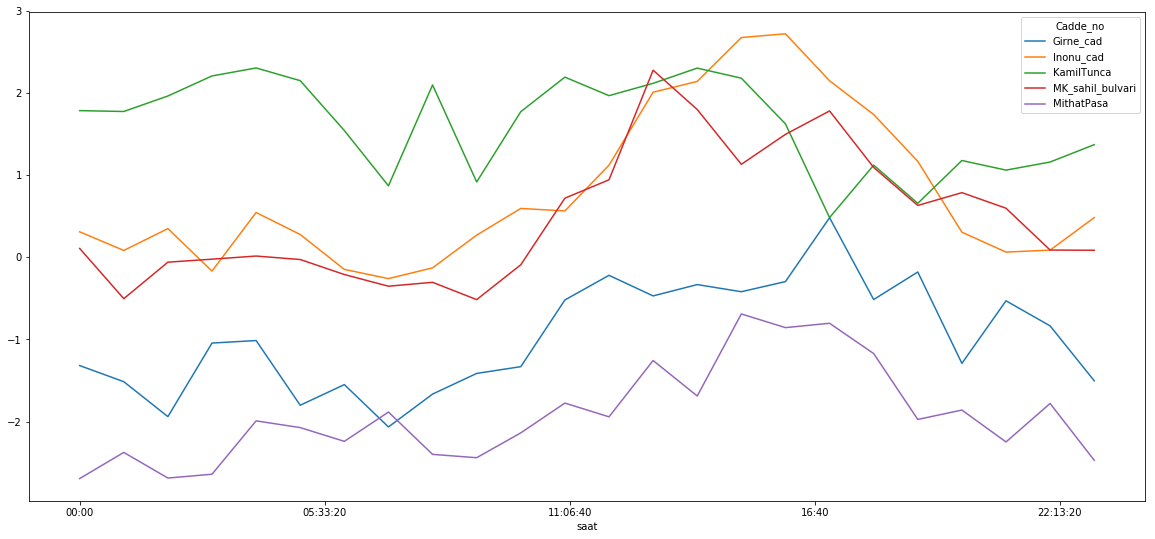

In [53]:
fig, ax = plt.subplots(figsize=(20,9))
tbl4.reset_index().pivot_table(index=['saat'], columns=('Cadde_no'), values=('PCA1_N')).plot(ax=ax)

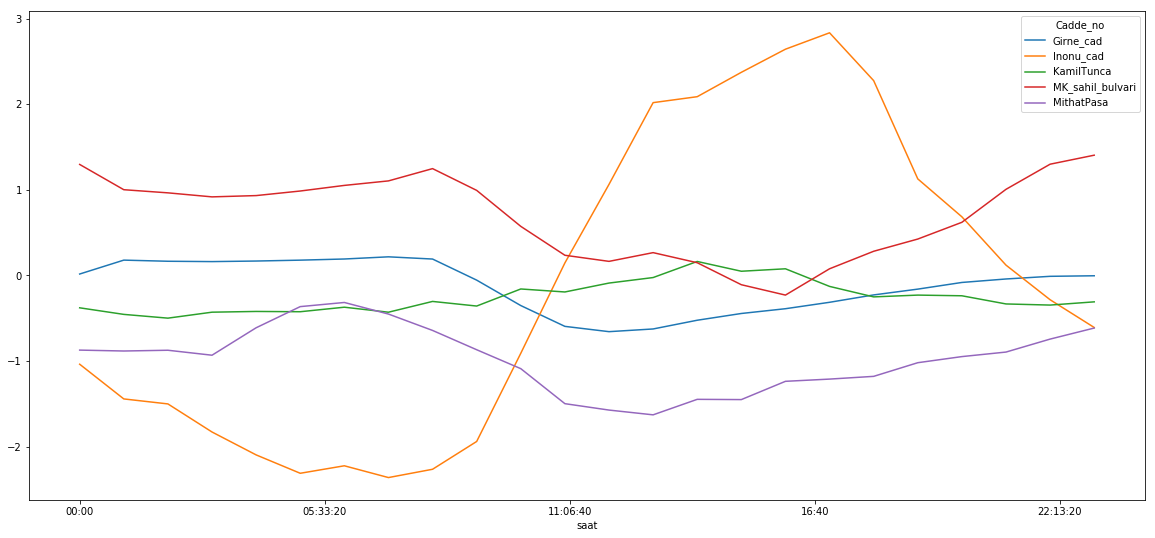

In [54]:
fig, ax = plt.subplots(figsize=(20,9))
tbl4.reset_index().pivot_table(index=['saat'], columns=('Cadde_no'), values=('nb')).plot(ax=ax)

In [55]:
tbl4.columns

Index(['Cadde_no', 'saat', 'so2', 'toz', 'CO', 'NO', 'NO2', 'NOx', 'O3',
       'ruzgar_hizi', 'ruzgar_yonu', 'sicaklik', 'nem', 'basinc',
       'kabin_sicakligi', 'Motorsiklet', 'otomobil', 'minibus_kamyonet',
       'PCA1', 'PCA2', 'PCA1_V', 'PCA2_V', 'PCA1_N', 'PCA2_N', 'nb'],
      dtype='object')

In [56]:
import statsmodels.api as sm # import statsmodels 
#a1=tbl4[tbl4['Cadde_no']=='MK_sahil_bulvari']
X = tbl4[["PCA1_N","PCA1_V",'nb']] ## X usually means our input variables (or independent variables)
y = tbl4["PCA1"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PCA1   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     15.12
Date:                Fri, 09 Nov 2018   Prob (F-statistic):           2.28e-08
Time:                        11:09:12   Log-Likelihood:                -238.99
No. Observations:                 120   AIC:                             486.0
Df Residuals:                     116   BIC:                             497.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1247      0.167      0.747      0.457      -0.206       0.455
PCA1_N        -0.7726      0.135     -5.729      0.000      -1.040      -0.505
PCA1_V         0.4820      0.119      4.049      0.000       0.246       0.718
nb             0.7816      0.177      4.424      0.000       0.432       1.132
==============================================================================
Omnibus:                       11.222   Durbin-Watson:                   0.381
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.517
Skew:                           0.722   Prob(JB):                      0.00316
Kurtosis:                       3.466   Cond. No.                         2.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
tbl4.head()

,Cadde_no,saat,so2,toz,CO,NO,NO2,NOx,O3,ruzgar_hizi,...,Motorsiklet,otomobil,minibus_kamyonet,PCA1,PCA2,PCA1_V,PCA2_V,PCA1_N,PCA2_N,nb
0,Girne_cad,00:00:00,24.185714,144.657143,2694.842857,89.000000,51.200000,140.185714,8.185714,0.928571,...,20.857143,847.857143,63.000000,2.245341,-0.718328,-1.278359,-0.458412,-1.317875,0.012948,0.016941
1,Girne_cad,01:00:00,24.242857,155.400000,2871.357143,95.728571,49.642857,145.342857,8.228571,0.671429,...,12.571429,529.428571,53.285714,2.529946,-0.920716,-1.768080,-0.220943,-1.514283,0.275941,0.179216
2,Girne_cad,02:00:00,22.057143,108.485714,2468.500000,70.785714,44.714286,115.514286,8.100000,1.042857,...,9.857143,231.714286,30.857143,1.071743,-0.659525,-2.130362,-0.183187,-1.939707,-1.117506,0.165961
3,Girne_cad,03:00:00,20.414286,88.242857,2108.071429,49.742857,39.471429,89.200000,7.985714,1.000000,...,5.142857,133.571429,15.428571,-0.034947,-0.531735,-2.383861,-0.127136,-1.043630,0.832908,0.162001
4,Girne_cad,04:00:00,18.657143,75.914286,1805.142857,29.314286,35.928571,65.257143,7.814286,0.985714,...,2.285714,78.000000,8.428571,-0.954399,-0.424825,-2.526773,-0.081961,-1.013159,1.048540,0.168574


In [59]:
tbl4['Pollution']=sc.inverse_transform(np.array(tbl4.PCA1).reshape(-1,1))

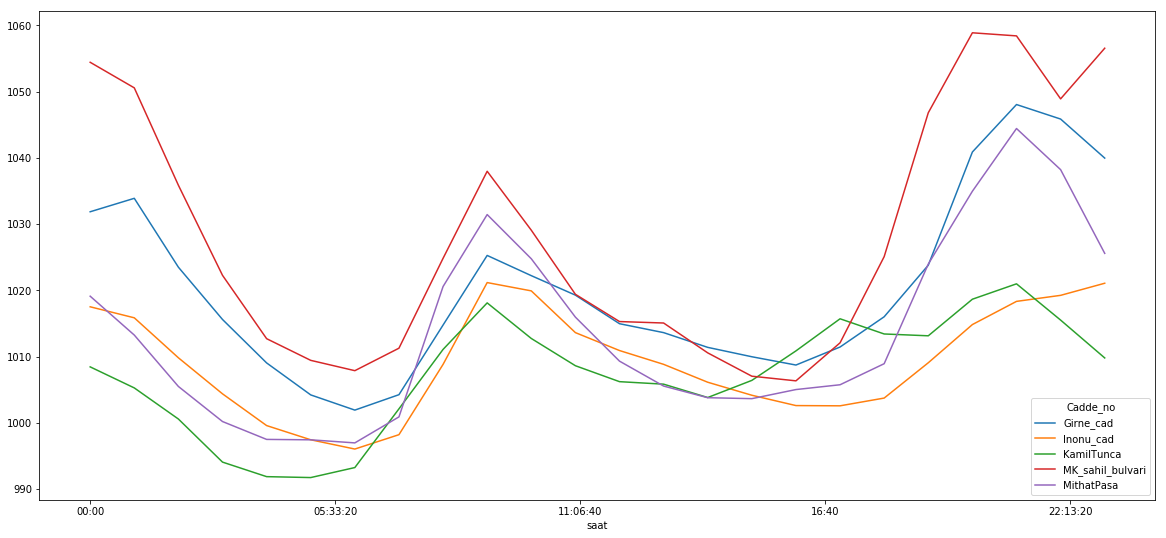

In [64]:
fig, ax = plt.subplots(figsize=(20,9))
tbl4.reset_index().pivot_table(index=['saat'], columns=('Cadde_no'), values=('Pollution')).plot(ax=ax)

In [163]:
tbl4.groupby('Cadde_no')['Pollution'].describe()

,count,mean,std,min,25%,50%,75%,max
Cadde_no,,,,,,,,
Girne_cad,24.0,1020.459654,13.393307,1001.946988,1011.061980,1015.829713,1026.939336,1048.068234
Inonu_cad,24.0,1009.352968,7.942512,996.068811,1003.480487,1008.973700,1016.292810,1021.195299
KamilTunca,24.0,1007.451258,8.476560,991.765054,1003.419296,1008.559142,1013.230787,1021.006994
MK_sahil_bulvari,24.0,1028.218022,18.691127,1006.363073,1011.900369,1023.573426,1047.350543,1058.896234
MithatPasa,24.0,1013.888535,13.874932,996.997802,1003.782401,1009.144552,1024.188405,1044.447413


In [160]:
d1 = tbl4.set_index('saat').sort_index()
ma_1h = d1.groupby('Cadde_no').rolling(1).mean()['Pollution'].dropna()
ma_1h=pd.DataFrame(ma_1h).reset_index()


In [156]:
final=[]
for i in ma_1h.Cadde_no.unique():
    for m in range(5,len(ma_1h.groupby(['saat'])),6):
        final.append(ma_1h[ma_1h['Cadde_no']==i].iloc[m,:])
        

In [157]:
final2=pd.DataFrame(final).reset_index()

In [158]:
final2

,index,Cadde_no,saat,Pollution
0,5,Girne_cad,05:00:00,1004.240745
1,11,Girne_cad,11:00:00,1019.299980
2,17,Girne_cad,17:00:00,1011.469601
3,23,Girne_cad,23:00:00,1039.985183
4,29,Inonu_cad,05:00:00,997.468308
5,35,Inonu_cad,11:00:00,1013.642443
6,41,Inonu_cad,17:00:00,1002.593522
7,47,Inonu_cad,23:00:00,1021.094786
8,53,KamilTunca,05:00:00,991.765054
9,59,KamilTunca,11:00:00,1008.645933


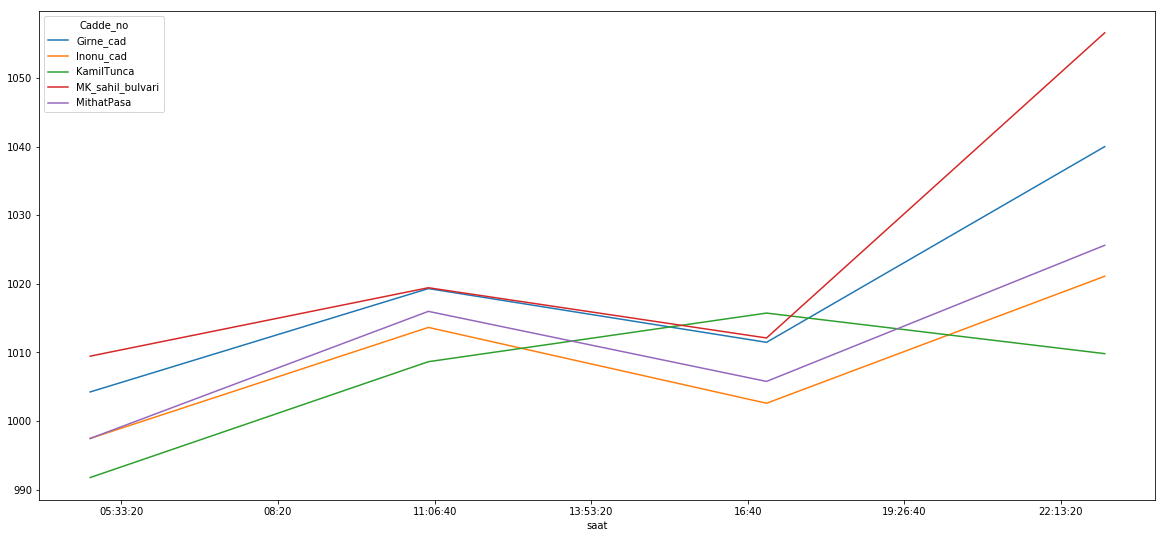

In [161]:
fig, ax = plt.subplots(figsize=(20,9))
final2.reset_index().pivot_table(index=['saat'], columns=('Cadde_no'), values=('Pollution')).plot(ax=ax)

In [ ]:
#lets make firstly done tbl2 table again with different name
#th=pd.DataFrame(tbl1)
#th=th.transpose().reset_index()
#th=pd.DataFrame(th)
#th.head()

In [ ]:
#from numpy.random import randint
#rng =pd.date_range('00:00:00', periods=5, freq='6H')
#timex = pd.DataFrame({'Random_Number':randint(1, 10, 5)}, index=rng)
#timex['hour'] = timex.index.strftime('%H:%M:%S')
#ts=[]
#for i in range(len(timex)):
#    ts.append(timex['hour'][i])

#ts

In [ ]:
#df2 = df.reset_index().pivot_table(index=['saat'], columns='Cadde_no', values='so2',aggfunc='mean')
#print (df2)
